In [1]:
# ============================================
# 1. IMPORT LIBRARIES
# ============================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score


In [2]:
# ============================================
# 2. LOAD DATA
# ============================================
# Assume df is already loaded from previous cells
df = pd.read_csv("data/jobs_salaries_2023.csv")

# Keep only relevant columns
df_job = df[["job_title", "salary_in_usd"]].dropna()

In [3]:
# ============================================
# 3. FEATURES AND TARGET
# ============================================
X = df_job[["job_title"]]
y = df_job["salary_in_usd"]

In [4]:
# ============================================
# 4. TRAIN/TEST SPLIT
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# ============================================
# 5. PREPROCESSING (ONE-HOT ENCODE JOB TITLE)
# ============================================
preprocessor = ColumnTransformer(
    transformers=[("job_title", OneHotEncoder(handle_unknown="ignore"), ["job_title"])]
)

In [6]:
# ============================================
# 6. LINEAR REGRESSION PIPELINE
# ============================================
lr_model_job = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)

# Train model
lr_model_job.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('job_title',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job_title'])])),
                ('regressor', LinearRegression())])

In [7]:
# ============================================
# 7. EVALUATE
# ============================================
y_pred_job = lr_model_job.predict(X_test)

print("Job Title Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_job))
print("RMSE:", root_mean_squared_error(y_test, y_pred_job))
print("R²:", r2_score(y_test, y_pred_job))

Job Title Linear Regression Performance:
MAE: 48323.78688106128
RMSE: 64130.783116474726
R²: 0.05867909775658986


In [ ]:
# ============================================
# 8. SAVE MODEL
# ============================================
import joblib

joblib.dump(lr_model_job, "models/linear_regression_job_title_model.pkl")
print("Model saved to linear_regression_job_title_model.pkl")

Model saved to linear_regression_job_title_model.pkl


<Figure size 1200x800 with 0 Axes>

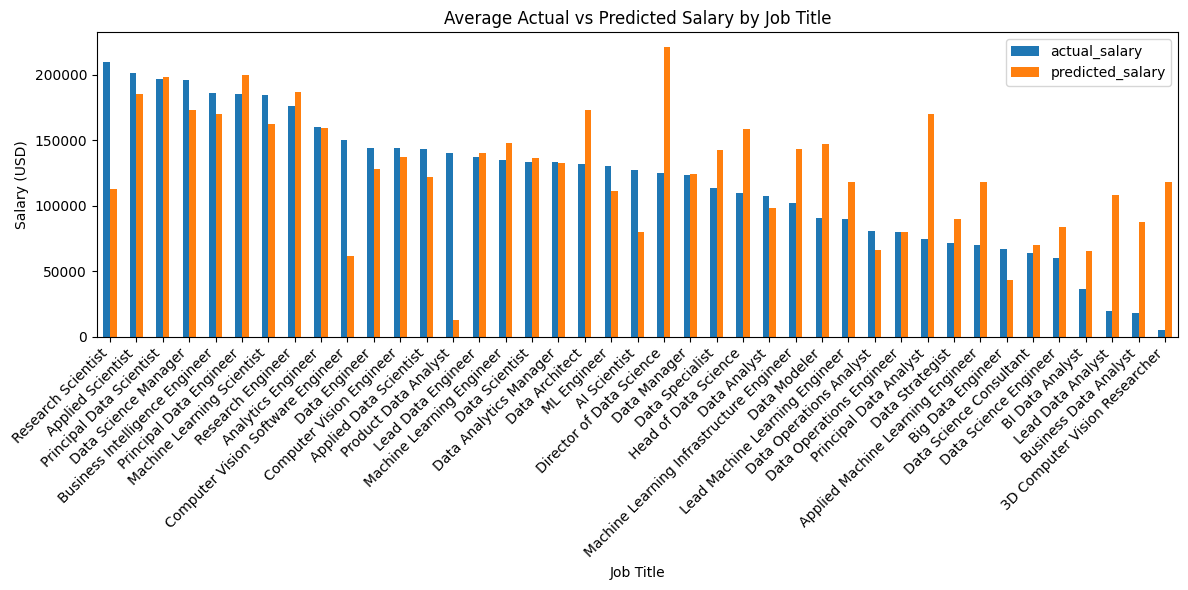

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# 9. VISUALIZE PREDICTIONS BY JOB TITLE
# ============================================

# Create dataframe for comparison
results = X_test.copy()
results["actual_salary"] = y_test.values
results["predicted_salary"] = y_pred_job

# Average salaries per job title
avg_results = results.groupby("job_title")[["actual_salary", "predicted_salary"]].mean()

# Sort by actual salary
avg_results = avg_results.sort_values(by="actual_salary", ascending=False)

# Plot actual vs predicted average salary
plt.figure(figsize=(12, 8))
avg_results.plot(kind="bar", figsize=(12, 6))
plt.title("Average Actual vs Predicted Salary by Job Title")
plt.ylabel("Salary (USD)")
plt.xlabel("Job Title")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

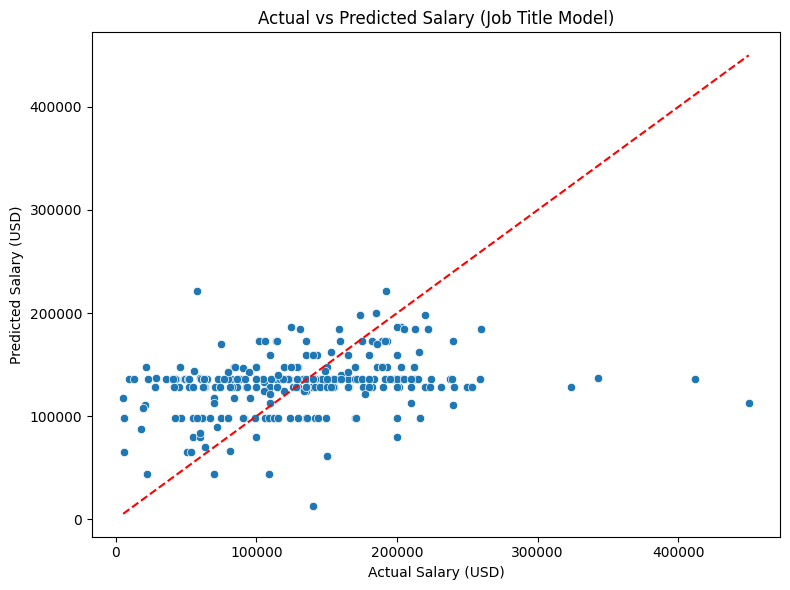

In [10]:
# ============================================
# 10. SCATTER PLOT: ACTUAL vs PREDICTED
# ============================================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_job)
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--"
)  # reference line
plt.title("Actual vs Predicted Salary (Job Title Model)")
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.tight_layout()
plt.show()